In [1]:
# Install the development version of the earthpy package
!pip install git+https://github.com/earthlab/earthpy@apppears

  Cloning https://github.com/earthlab/earthpy (to revision apppears) to /tmp/pip-req-build-9i6n66pf
  Running command git clone --filter=blob:none --quiet https://github.com/earthlab/earthpy /tmp/pip-req-build-9i6n66pf
  Running command git checkout -b apppears --track origin/apppears
  Switched to a new branch 'apppears'
  Branch 'apppears' set up to track remote branch 'apppears' from 'origin'.
  Resolved https://github.com/earthlab/earthpy to commit 7241165d59af510d62bba312e48c7f513bc9dc05
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import getpass
import json
import os
import pathlib
from glob import glob

import earthpy.appeears as eaapp
import geopandas as gpd
import hvplot.pandas
import hvplot.xarray
import pandas as pd
import rioxarray as rxr
import xarray as xr

In [3]:
data_dir = os.path.join(
    pathlib.Path.home(), 'grizzly-creek')
# Make the data directory
os.makedirs(data_dir, exist_ok=True)

In [4]:
# Download the Grizzly Creek fire boundary

url = (
    "https://services3.arcgis.com/T4QMspbfLg3qTGWY/arcgis/rest/services"
    "/WFIGS_Interagency_Perimeters/FeatureServer/0/query"
    "?where=attr_IncidentName%20%3D%20%27GRIZZLY%20CREEK%27"
    "&outFields=*&outSR=4326&f=json")
print(url)
bounds_gdf= gpd.read_file(url)

https://services3.arcgis.com/T4QMspbfLg3qTGWY/arcgis/rest/services/WFIGS_Interagency_Perimeters/FeatureServer/0/query?where=attr_IncidentName%20%3D%20%27GRIZZLY%20CREEK%27&outFields=*&outSR=4326&f=json


/opt/conda/lib/python3.11/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/opt/conda/lib/python3.11/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/opt/conda/lib/python3.11/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/opt/conda/lib/python3.11/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime withou

In [5]:
bounds_gdf = bounds_gdf.loc[[1]]
bounds_gdf

,OBJECTID,poly_SourceOID,poly_IncidentName,poly_FeatureCategory,poly_MapMethod,poly_GISAcres,poly_CreateDate,poly_DateCurrent,poly_PolygonDateTime,poly_IRWINID,...,attr_Source,attr_IsCpxChild,attr_CpxName,attr_CpxID,attr_SourceGlobalID,GlobalID,Shape__Area,Shape__Length,attr_IncidentComplexityLevel,geometry
1,14453,13272,Grizzly Creek,Wildfire Final Fire Perimeter,Infrared Image,32431.62,NaT,2023-03-14 15:13:42.810000+00:00,2020-09-04 00:37:00+00:00,{BC150C8C-D9C8-4C14-8725-2B84D7695302},...,FODR,None,None,None,{E4E21DCE-C8EE-4133-B9F7-5CA2E5FBF79C},c9133643-c537-4030-a059-04d80c6c3a96,0.013763,1.34652,None,"MULTIPOLYGON (((-107.19151 39.66880, -107.1914..."


<class 'geopandas.geodataframe.GeoDataFrame'>


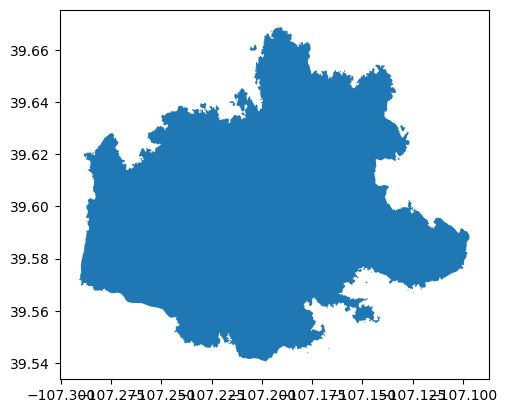

In [6]:
bounds_gdf.plot()
print(type(bounds_gdf))

In [7]:
bounds_gdf.hvplot(
    title='Grizzly Creek Fire Boundary, 2020',
    tiles='ESRI',
    geo=True)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [8]:
# Initialize AppeearsDownloader for MODIS NDVI data
ndvi_downloader = eaapp.AppeearsDownloader(
    download_key='cp-ndvi',
    ea_dir=data_dir,
    product='HLSL30.020',
    layer='B05',
    start_date="01-01",
    end_date="01-31",
    recurring=True,
    year_range=[2021, 2021],
    polygon=bounds_gdf
)

In [10]:
# Initialize AppeearsDownloader for MODIS NDVI data
ndvi_downloader = eaapp.AppeearsDownloader(
    download_key='cp-ndvi',
    ea_dir=data_dir,
    product='HLSL30.020',
    layer='B04',
    start_date="07-01",
    end_date="07-31",
    recurring=True,
    year_range=[2018, 2023],
    polygon=bounds_gdf
)
ndvi_downloader.download_files(cache=True)

KeyboardInterrupt: 